In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np

In [3]:
import random

In [4]:
#prepare data
#f(x)= x**3 + x**2 - x - 1
X = tf.placeholder(tf.float32)
Y = X**3+X**2-X-1

train_x = list(np.arange(-100,100,0.1))
random.shuffle(train_x)

with tf.Session() as sess:
    #add noise
    train_y = sess.run(Y, {X:train_x})+np.random.normal(0,0.09)
    #print(train_x,train_y)

In [5]:
#some training args
nsteps = 300
#batch_size = 4
show_step = True
lr = 0.1

#num of units in hidden layer
h1 = 100
h2 = 200

In [6]:
def fc_layer(x, n_units, name):
    input_dim = x.get_shape()[1]
    #print out hidden layer shape
    print('input shape '+name+'= '+str(input_dim))
    w = tf.get_variable("W"+name, dtype=tf.float32, shape=[input_dim, n_units], initializer=tf.truncated_normal_initializer(stddev=0.01))
    b = tf.get_variable('b'+name, dtype=tf.float32, initializer=tf.constant(0., shape=[n_units], dtype=tf.float32))
    return tf.matmul(x,w)+b

    

In [7]:
def nnet(x):
    layer1 = fc_layer(x, h1, 'fc1')
    layer1 = tf.nn.relu(layer1)
    layer2 = fc_layer(layer1, h2, 'fc2')
    layer2 = tf.nn.relu(layer2)
    layerout = fc_layer(layer2, 1, 'fco')
    return layerout

In [8]:
#input tensor
X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='X')
y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='y')

#construct model
logits = nnet(X)


input shape fc1= 1
Instructions for updating:
Colocations handled automatically by placer.
input shape fc2= 100
input shape fco= 200


In [9]:
loss_opt = tf.reduce_mean(tf.square(y-logits))
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train = optimizer.minimize(loss_opt)

correct_predict = tf.equal(tf.argmax(logits,1), tf.argmax(y,1))

accuracy = tf.reduce_mean(tf.cast(correct_predict, tf.float32))

In [10]:
def cut_batch(x,y,size,index):
    sub_x = []
    sub_y = []
    for i in range(size):
        cur = size*index+i
        if(cur < len(x)):
            sub_x.append(x[size*index+i])
            sub_y.append(y[size*index+i])
        else: break
        
    return sub_x, sub_y

In [11]:
import matplotlib.pyplot as plt

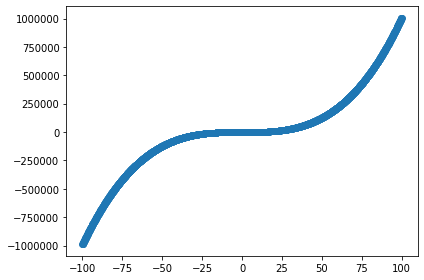

In [12]:
fig,ax = plt.subplots()
fig.set_tight_layout(True)
ax.scatter(train_x,train_y)

In [13]:
#train data input format config
train_x = np.array(train_x,float)[:,np.newaxis]
train_y = np.array(train_y,float)[:,np.newaxis]

In [14]:
predict = []

    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(nsteps):
        '''
        batch_x, batch_y = cut_batch(train_x, train_y, batch_size, i)
        batch_x = np.array(batch_x,float)[:,np.newaxis]
        for j in range(len(batch_y)):
            #add noise
            batch_y[j]+=np.random.normal(0,0.09)
        batch_y = np.array(batch_y,float)[:,np.newaxis]
        '''
        
        
        _,loss,acc = sess.run([train,loss_opt,accuracy],{X:train_x, y:train_y})
        
        if(show_step):
            print("Step " + str(i+1) + " , Loss= " + str(loss))
        
    print("Train Finished")
    
    predict = sess.run(logits,{X:train_x})
    

Step 1 , Loss= 142827670000.0
Step 2 , Loss= 142823050000.0
Step 3 , Loss= 142613430000.0
Step 4 , Loss= 142163400000.0
Step 5 , Loss= 141114800000.0
Step 6 , Loss= 139182490000.0
Step 7 , Loss= 136032270000.0
Step 8 , Loss= 131282650000.0
Step 9 , Loss= 124570760000.0
Step 10 , Loss= 115585700000.0
Step 11 , Loss= 104133165000.0
Step 12 , Loss= 90235820000.0
Step 13 , Loss= 74280590000.0
Step 14 , Loss= 57235448000.0
Step 15 , Loss= 40933360000.0
Step 16 , Loss= 28487719000.0
Step 17 , Loss= 24095867000.0
Step 18 , Loss= 30559416000.0
Step 19 , Loss= 41676214000.0
Step 20 , Loss= 46544245000.0
Step 21 , Loss= 42864693000.0
Step 22 , Loss= 35103056000.0
Step 23 , Loss= 28030013000.0
Step 24 , Loss= 24157577000.0
Step 25 , Loss= 23702036000.0
Step 26 , Loss= 25514359000.0
Step 27 , Loss= 28110500000.0
Step 28 , Loss= 30323495000.0
Step 29 , Loss= 31501883000.0
Step 30 , Loss= 31447773000.0
Step 31 , Loss= 30291177000.0
Step 32 , Loss= 28384877000.0
Step 33 , Loss= 26223110000.0
Step 34 

Step 290 , Loss= 1317771900.0
Step 291 , Loss= 1297438700.0
Step 292 , Loss= 1267879400.0
Step 293 , Loss= 1245567900.0
Step 294 , Loss= 1220219800.0
Step 295 , Loss= 1196090200.0
Step 296 , Loss= 1174485500.0
Step 297 , Loss= 1149572400.0
Step 298 , Loss= 1130461700.0
Step 299 , Loss= 1106233300.0
Step 300 , Loss= 1088087800.0
Train Finished


In [16]:
print("HW4 part 1 result here:")

HW4 part 1 result here:


hidden layer 1: 100
hidden layer 2: 200


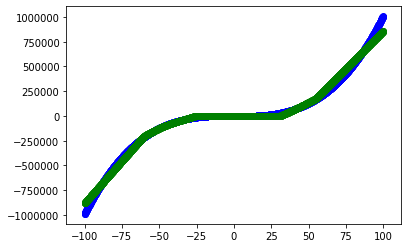

In [17]:
#plot result
print("hidden layer 1: "+str(h1)+"\nhidden layer 2: "+str(h2))
plt.scatter(train_x,train_y,color='blue')
plt.scatter(train_x,predict, color='green')
plt.show()


In [ ]:
#num of units in hidden layer
h1 = 50
h2 = 100

#construct model
logits = nnet(X)